In [ ]:
!pip install creme

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df.head()

In [ ]:
df.shape

(1781, 7)

In [ ]:
df.dtypes

REMOTE_APP_PACKETS         int64
SOURCEAPPBYTES             int64
DISTREMOTETCPPORT          int64
TCPCONVERSATIONEXCHANGE    int64
REMOTEIPS                  int64
REMOTEAPPBYTES             int64
Type                       int64
dtype: object

In [ ]:
df.isnull().sum()

REMOTE_APP_PACKETS         0
SOURCEAPPBYTES             0
DISTREMOTETCPPORT          0
TCPCONVERSATIONEXCHANGE    0
REMOTEIPS                  0
REMOTEAPPBYTES             0
Type                       0
dtype: int64

In [ ]:
for i in df.columns:
    print(i,df[i].nunique())

REMOTE_APP_PACKETS 116
SOURCEAPPBYTES 885
DISTREMOTETCPPORT 66
TCPCONVERSATIONEXCHANGE 103
REMOTEIPS 18
REMOTEAPPBYTES 822
Type 2


In [ ]:
df.Type.value_counts()

0    1565
1     216
Name: Type, dtype: int64

C:\DBDA\desktop\Python\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distrubution \n (0:safe domain || 1: Malicious domain)')

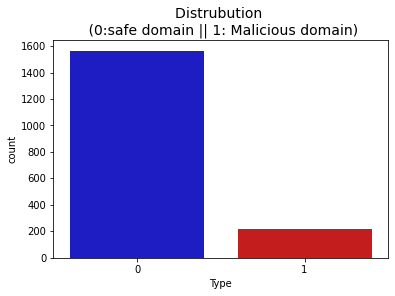

In [ ]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('Type', data=df, palette=colors)
plt.title('Distrubution \n (0:safe domain || 1: Malicious domain)', fontsize=14)

In [ ]:
malicious_domain = df.loc[df['Type'] == 1]

safe_domain = df.loc[df['Type'] == 0][:300]

In [ ]:
malicious_domain.Type.count()

216

In [ ]:
safe_domain.Type.count()

300

In [ ]:
Normlize_dis = pd.concat([malicious_domain,safe_domain])

In [ ]:
df2 = Normlize_dis.sample(frac=1, random_state=42)

In [ ]:
df2.head(10)

,REMOTE_APP_PACKETS,SOURCEAPPBYTES,DISTREMOTETCPPORT,TCPCONVERSATIONEXCHANGE,REMOTEIPS,REMOTEAPPBYTES,Type
106,0,0,0,0,0,0,0
336,13,4860,0,12,4,1631,0
259,5,306,3,3,1,366,0
1619,2,124,0,0,0,0,1
338,21,14373,0,17,4,2615,0
1341,12,1489,0,10,4,1205,1
1758,2,124,0,0,0,0,1
353,0,0,0,0,0,0,0
129,0,0,0,0,0,0,0
37,8,1138,0,4,1,823,0


C:\DBDA\desktop\Python\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distrubution \n (0:safe domain || 1: Malicious domain)')

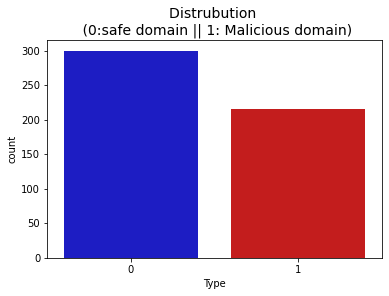

In [ ]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('Type', data=df2, palette=colors)
plt.title('Distrubution \n (0:safe domain || 1: Malicious domain)', fontsize=14)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,precision_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import OneHotEncoder


from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV

from utils import predict_and_evaluate
from sklearn.model_selection import cross_val_score,KFold

In [ ]:
# Separate target variable
X = df2.drop(['Type'], axis=1)
y = df2['Type']

In [ ]:
df2["Type"].dtype

dtype('int64')

In [ ]:
# Split the data into train and test samples
# 80% samples for test and 20% for test sample
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [ ]:
X_test.head()

,REMOTE_APP_PACKETS,SOURCEAPPBYTES,DISTREMOTETCPPORT,TCPCONVERSATIONEXCHANGE,REMOTEIPS,REMOTEAPPBYTES
506,25,3786,1,21,5,2983
1521,5,416,1,1,1,90
294,5,306,6,8,6,696
165,44,23985,47,76,12,9891
324,19,1294,10,14,6,1246


In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
rf_pred = rf.predict(X_test)

In [ ]:
rf_pred

array([1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0], dtype=int64)

In [ ]:
# Accuracy score
print('Accuracy score: ',accuracy_score(y_test, rf_pred)*100)

Accuracy score:  88.46153846153845


In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, rf_pred)
print('Confusion matrix\n',cm)

Confusion matrix
 [[46  8]
 [ 4 46]]


In [ ]:
# Classification report
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        54
           1       0.85      0.92      0.88        50

    accuracy                           0.88       104
   macro avg       0.89      0.89      0.88       104
weighted avg       0.89      0.88      0.88       104



In [ ]:
# AUC 
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,rf_pred)

0.8859259259259259

# Cross Validation
## Using k fold

In [ ]:
Kfold_val = KFold(5)

In [ ]:
Kfold_val = KFold(5)
score_rf = cross_val_score(rf, X, y, cv= Kfold_val, scoring='accuracy')
print(score_rf)
np.mean(score_rf)

[0.85576923 0.91262136 0.86407767 0.91262136 0.94174757]


0.897367438386856

In [ ]:
# Feature importance of Random forest
rf.feature_importances_

array([0.17588229, 0.25269229, 0.27837343, 0.08290842, 0.0720226 ,
       0.13812098])

In [ ]:
# Get Feature importance of Random forest
fi = pd.Series(rf.feature_importances_, index=X_train.columns)

In [ ]:
# Sorting the result in descending order for Random forest
#feature_importances.sort_values(ascending=False, inplace=True)
fi.sort_values(ascending=False, inplace=True)

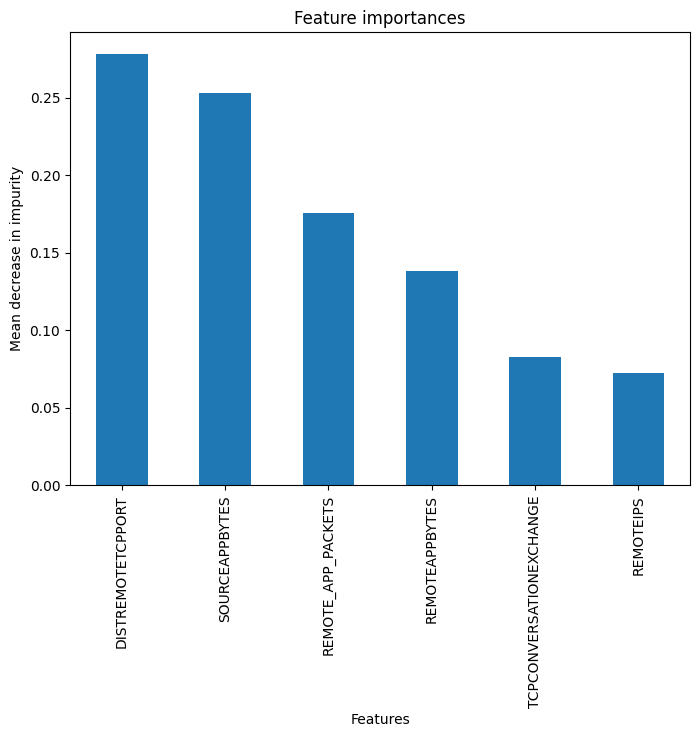

In [ ]:
# Plot the graph of feature importances showing the score
fig = plt.figure(figsize=(8,6), dpi=100)
fi.plot.bar()
plt.title('Feature importances')
plt.xlabel('Features')
plt.ylabel('Mean decrease in impurity')
plt.show()

# 2. Gradient Boosting Model

In [ ]:
gbm = GradientBoostingClassifier()

In [ ]:
gbm.fit(X_train,y_train)

GradientBoostingClassifier()

# 2.2 Evaluating the model

In [ ]:
# Predict the Test set results
gbm_pred = gbm.predict(X_test)
gbm_pred[:20]

array([1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0],
      dtype=int64)

In [ ]:
print('Accuracy : \n', accuracy_score(y_test, gbm_pred)*100)

Accuracy : 
 88.46153846153845


In [ ]:
# Precision (P)
print( "Precision: \n", precision_score(y_test,gbm_pred))

Precision: 
 0.8653846153846154


In [ ]:
# Classification report
print(classification_report(y_test,gbm_pred))

              precision    recall  f1-score   support

           0       0.90      0.87      0.89        54
           1       0.87      0.90      0.88        50

    accuracy                           0.88       104
   macro avg       0.88      0.89      0.88       104
weighted avg       0.89      0.88      0.88       104



# 3. Xtreme Gradient Boosting

In [ ]:
from xgboost import XGBClassifier

# 3.1 Model Training

In [ ]:
xgb = XGBClassifier()

In [ ]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [ ]:
# Predict the Test set results
xgb_pred = xgb.predict(X_test)
xgb_pred[:20]

array([1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0])

In [ ]:
print('Accuracy : \n', accuracy_score(y_test, xgb_pred)*100)

Accuracy : 
 86.53846153846155


In [ ]:
# Classification report
print(classification_report(y_test,xgb_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        54
           1       0.85      0.88      0.86        50

    accuracy                           0.87       104
   macro avg       0.87      0.87      0.87       104
weighted avg       0.87      0.87      0.87       104



# Hyperparameter Optimization

In [ ]:
# Set the parameter matrix for Random forest
random_grid = {'n_estimators': [10],
              'max_features': ['auto'],
              'max_depth': range(10,20,2),
              'min_samples_leaf':[2],
              'bootstrap': ['True']}
grid_rnf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=random_grid, n_jobs = 16, cv= 5)

In [ ]:
%time
grid_rnf.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 0 ns


C:\DBDA\desktop\Python\python\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=16,
             param_grid={'bootstrap': ['True'], 'max_depth': range(10, 20, 2),
                         'max_features': ['auto'], 'min_samples_leaf': [2],
                         'n_estimators': [10]})

In [ ]:
grid_rnf.best_params_

{'bootstrap': 'True',
 'max_depth': 14,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'n_estimators': 10}

In [ ]:
rnd_first = grid_rnf.best_estimator_

In [ ]:
rnd_first_hpo = predict_and_evaluate(rnd_first, X_test, y_test)

Algorithm,False Positives,False Negatives,Precision,Recall,F1 Score
RandomForestClassifier,8,4,0.85,0.92,0.88


In [ ]:
import pickle

In [ ]:
#12	1489	0	10	4	1205	   5	306	6	8	6	696  12	1489	0	10	4	1205	1

In [ ]:
#print(model.predict([[5,306,6,8,6,696]]))

In [ ]:
#Saving the model
pickle.dump(grid_rnf, open('model1.pkl' , 'wb'))

In [ ]:
#loading the model

model1 = pickle.load(open('model1.pkl','rb'))

In [ ]:
print(model1.predict([[5,306,6,8,6,696]]))

[0]


C:\DBDA\desktop\Python\python\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


It shows Predction as **"Safe Domain"**

In [ ]:
#12	1489	0	10	4	1205	1

In [ ]:
print(model1.predict([[12,1489,0,10,4,1205]]))

[1]


C:\DBDA\desktop\Python\python\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


It shows Predction as **"Malicious domain"**

In [9]:
from creme import compose
from creme import datasets
from creme import linear_model
from creme import metrics
from creme import preprocessing

X_y = datasets.Phishing()

model = compose.Pipeline(
   preprocessing.StandardScaler(),
 linear_model.LogisticRegression()
)
metric = metrics.Accuracy()


for x, y in X_y:
    y_pred = model.predict_one(x)      # make a prediction
    metric = metric.update(y, y_pred)  # update the metric
    model = model.fit_one(x, y)        # make the model learn

metric

Accuracy: 89.20%

In [5]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('Type', data=df, palette=colors)
plt.title('Distrubution \n (0:safe domain || 1: metric)', fontsize=14)